In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline
from scipy.optimize import curve_fit
import pandas as pd

In [4]:
def polynomial(x,y,k,w=None):
    
    '''
    Draw a curve through a dataset defined by (x,y) using a polynomial
    
    If k = 1: Straight line is fitted through data
    If k = 2: Quadratic polynomial is fitted through data
    If k = 3: Cubic polynomial is fitted through data
    
    The polynomials are generated using the class UnivariateSpline which calculates splines.
    A polynomial is the same as a spline with two knots (at the extremes of the considered interval)
    '''
    
    m = len(x)                       # Number of points in dataset
    s = m                            # Default smoothing factor is equal to the number of data points m
    done = False                     # Determines if the algorithm is finished or not
    
    '''
    A first spline is calculated
    If it has two knots, the algorithm is finished
    '''
    
    sp = UnivariateSpline(x,y,w,[None,None],k,s)              # A new spline is calculated using the new residual s
    nr_knots = len(sp.get_knots())                            # Number of knots of the new spline
    
    if nr_knots == 2:
        
        return sp
        
    '''
    If the number of knots is higher than 2, a higher smoothing factor is needed to decrease the number of knots
    The smoothing factor is doubled until the number of knots equals 2
    '''
    
    while not done:
        
        s *= 2                         # Residual is doubled
        
        sp = UnivariateSpline(x,y,w,[None,None],k,s)              # A new spline is calculated using the new residual s
        nr_knots = len(sp.get_knots())                            # Number of knots of the new spline
        
        if nr_knots == 2:                                         # Algorithm is finished if nr_knots equals 2
            done = True                                              
    
    return sp

In [21]:
x = np.linspace(0,9,10)
y = np.exp(-x) + np.random.random(10)*0

In [22]:
#Shape1
x = [95.81608347,249.1218171,359.3044234]
y = [23.76814889,26.09464349,57.38339297]

In [5]:
#Shape2
x = [0, 0.495, 0.99]
y = [1, 0.754975, 0.0199]

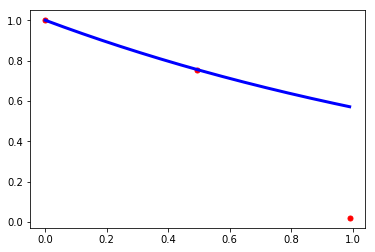

In [6]:
m = len(x)

y_min = min(y)

y0 = np.linspace(y_min,y_min,1)
y = y - y0 + 10**-10

w = np.power(y,1)

ln_y = np.log(y)
sp = polynomial(x,ln_y,1,w)

xs = np.linspace(x[0],x[m-1],1000)
y_pred = np.exp(sp(xs))

plt.plot(x, y+y0, 'ro', ms=5)
plt.plot(xs, y_pred+y0, 'b', lw=3)

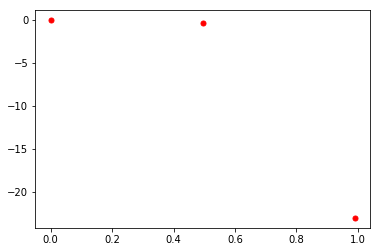

In [7]:
plt.plot(x, ln_y, 'ro', ms=5)

In [8]:
#Shape3
x = [51.10191118,100.6052411,223.5708615]
y = [42.28049668,26.27784215,26.509831]

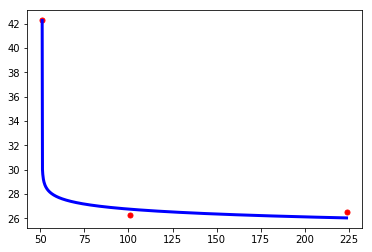

In [9]:
m = len(x)

x_min = x[0]

x0 = np.linspace(x_min,x_min,1)
x = x - x0 + 10**-10

ln_x = np.log(x)
sp = polynomial(ln_x,y,1)

xs = np.linspace(x[0],x[m-1],1000)
ln_xs = np.log(xs)

y_pred = sp(ln_xs)

plt.plot(x + x_min, y, 'ro', ms=5)
plt.plot(xs + x_min, y_pred, 'b', lw=3)

In [10]:
#Shape4
x = [51.10191118,100.6052411,223.5708615]
y = [57.17892445,72.74037707,72.29501013]

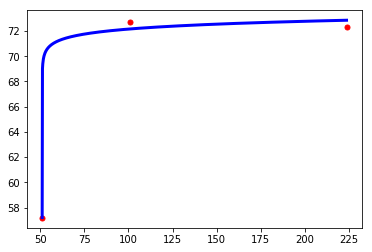

In [11]:
m = len(x)

x_min = x[0]

x0 = np.linspace(x_min,x_min,1)
x = x - x0 + 10**-10

ln_x = np.log(x)
sp = polynomial(ln_x,y,1)

xs = np.linspace(x[0],x[m-1],1000)
ln_xs = np.log(xs)

y_pred = sp(ln_xs)

plt.plot(x + x_min, y, 'ro', ms=5)
plt.plot(xs + x_min, y_pred, 'b', lw=3)

In [12]:
#Shape1
x = [95.81608347,249.1218171,359.3044234]
y = [23.76814889,26.09464349,57.38339297]

In [13]:
#Shape2
x = [0, 0.495, 0.99]
y = [1, 0.754975, 0.0199]

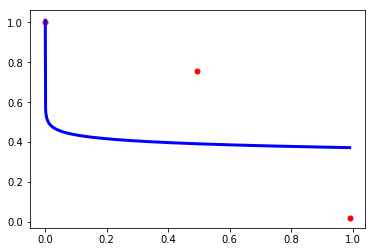

In [14]:
m = len(x)

x_min = x[0]

x0 = np.linspace(x_min,x_min,1)
x = x - x0 + 10**-10

ln_x = np.log(x)
sp = polynomial(ln_x,y,1)

xs = np.linspace(x[0],x[m-1],1000)
ln_xs = np.log(xs)

y_pred = sp(ln_xs)

plt.plot(x + x_min, y, 'ro', ms=5)
plt.plot(xs + x_min, y_pred, 'b', lw=3)

In [15]:
x = [1, 2, 3]
x.reverse()
print(x)

[3, 2, 1]


In [16]:
#Shape1
x = [95.81608347,249.1218171,359.3044234]
y = [23.76814889,26.09464349,57.38339297]

In [17]:
y_min = min(y)
y_max = max(y)
x_avg = (x[0] + x[m-1])/2

A_0 = np.exp(-x_avg/y_max)
B_0 = 1/y_max
C_0 = y_min

#curve_fit(lambda t,a,b,c: a*np.exp(b*t)+c,  x,  y, p0=(A_0, B_0, C_0))
curve_fit(lambda t,a,b,c: a*np.exp(b*t)+c,  x,  y, p0=(400, -0.065, 27))

C:\Users\sebas\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


(array([ 1.68085670e+06, -4.41606468e+01,  3.57487285e+01]),
 array([[inf, inf, inf],
        [inf, inf, inf],
        [inf, inf, inf]]))

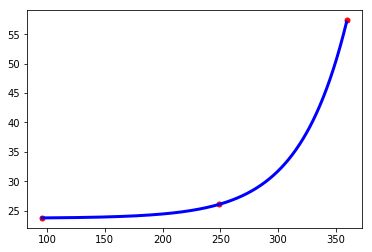

In [18]:
m = len(x)

xs = np.linspace(x[0],x[m-1],1000)

A = 0.006
B = 0.024
C = 23.7

ys = A * np.exp(B*xs) + C

plt.plot(x, y, 'ro', ms=5)
plt.plot(xs, ys, 'b', lw=3)

In [19]:
#Shape2
x = [0, 0.495, 0.99]
y = [1, 0.754975, 0.0199]

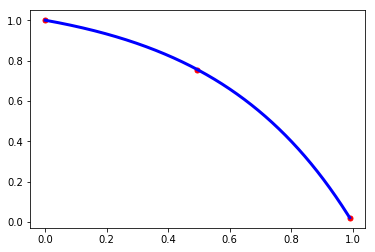

In [20]:
m = len(x)

xs = np.linspace(x[0],x[m-1],1000)

A = -0.1225
B = 2.219
C = 1.123

ys = A * np.exp(B*xs) + C

plt.plot(x, y, 'ro', ms=5)
plt.plot(xs, ys, 'b', lw=3)

In [21]:
#Shape3
x = [51.10191118,100.6052411,223.5708615]
y = [42.28049668,26.27784215,26.509831]

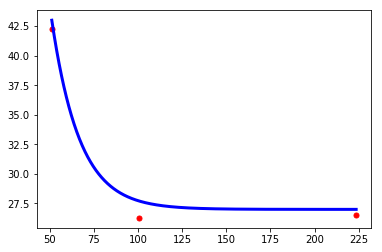

In [22]:
m = len(x)

xs = np.linspace(x[0],x[m-1],1000)

A = 400
B = -0.063
C = 27

ys = A * np.exp(B*xs) + C

plt.plot(x, y, 'ro', ms=5)
plt.plot(xs, ys, 'b', lw=3)

1) EXPONENTIAL FUNCTION

In [23]:
#Shape1
x = [95.81608347,249.1218171,359.3044234]
y = [23.76814889,26.09464349,57.38339297]

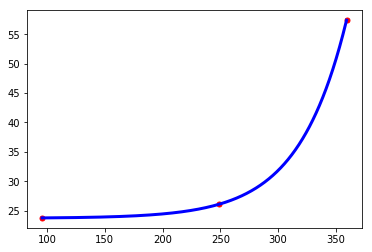

In [24]:
m = len(x)

C = np.linspace(23.7,23.7,1)

w = np.power(y - C,1)

ln_y = np.log(y - C)
sp = polynomial(x,ln_y,1,w)

xs = np.linspace(x[0],x[m-1],1000)
y_pred = np.exp(sp(xs))

plt.plot(x, y, 'ro', ms=5)
plt.plot(xs, y_pred + C, 'b', lw=3)

In [25]:
#Shape2
x = [0, 0.495, 0.99]
y = [1, 0.754975, 0.0199]

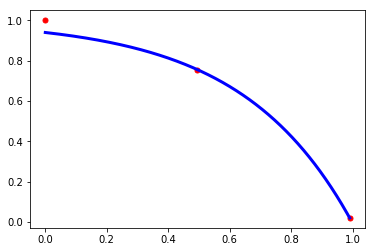

In [26]:
m = len(x)

C = np.linspace(1.001,1.001,1)
min1 = np.linspace(-1,-1,1)

w = np.power(min1*(y - C),1)

ln_y = np.log(min1*(y - C))
sp = polynomial(x,ln_y,1,w)

xs = np.linspace(x[0],x[m-1],1000)
y_pred = np.exp(sp(xs))

plt.plot(x, y, 'ro', ms=5)
plt.plot(xs, min1*(y_pred - C), 'b', lw=3)

In [27]:
#Shape3
x = [51.10191118,100.6052411,223.5708615]
y = [42.28049668,26.27784215,26.509831]

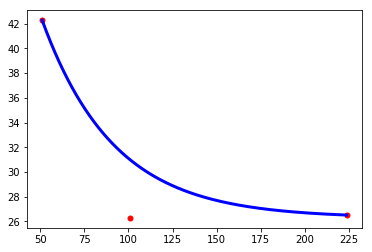

In [28]:
m = len(x)

C = np.linspace(26.27784214,26.27784214,1)

w = np.power(y - C,1)

ln_y = np.log(y - C)
sp = polynomial(x,ln_y,1,w)

xs = np.linspace(x[0],x[m-1],1000)
y_pred = np.exp(sp(xs))

plt.plot(x, y, 'ro', ms=5)
plt.plot(xs, y_pred + C, 'b', lw=3)

In [29]:
#Shape4
x = [51.10191118,100.6052411,223.5708615]
y = [57.17892445,72.74037707,72.29501013]

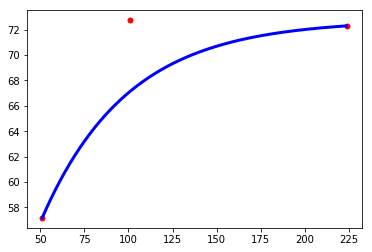

In [30]:
m = len(x)

C = np.linspace(72.75,72.75,1)
min1 = np.linspace(-1,-1,1)

w = np.power(min1*(y - C),1)

ln_y = np.log(min1*(y - C))
sp = polynomial(x,ln_y,1,w)

xs = np.linspace(x[0],x[m-1],1000)
y_pred = np.exp(sp(xs))

plt.plot(x, y, 'ro', ms=5)
plt.plot(xs, min1*(y_pred - C), 'b', lw=3)

2) LOGARITHMIC FUNCTION

In [31]:
#Shape1
x = [95.81608347,249.1218171,359.3044234]
y = [23.76814889,26.09464349,57.38339297]

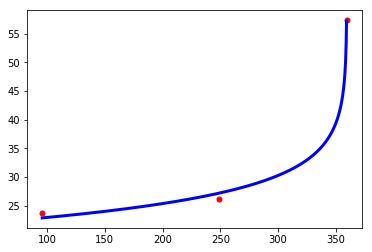

In [32]:
x = np.array(x)

m = len(x)

x_rev = list(reversed(x))
y_rev = list(reversed(y))

C = x[-1] + 10**-3*(x[-1] - x[0])

ln_x = np.log(-(x_rev - C))
sp = polynomial(ln_x,y_rev,1)

xs = np.linspace(min1*(x_rev[0] - C), min1*(x_rev[m-1] - C),1000)
ln_xs = np.log(xs)
y_pred = sp(ln_xs)

plt.plot(x, y, 'ro', ms=5)
plt.plot(min1*(xs - C), y_pred, 'b', lw=3)

x_log = list(reversed(min1*(xs - C)))
y_log = list(reversed(y_pred))

In [33]:
#Shape2
x = [0, 0.495, 0.99]
y = [1, 0.754975, 0.0199]

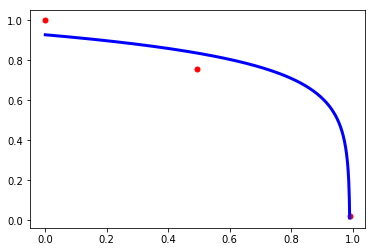

In [34]:
x = np.array(x)

m = len(x)

x_rev = list(reversed(x))
y_rev = list(reversed(y))

C = x[-1] + 10**-3*(x[-1] - x[0])
min1 = np.linspace(-1,-1,1)

ln_x = np.log(min1*(x_rev - C))
sp = polynomial(ln_x,y_rev,1)

xs = np.linspace(min1*(x_rev[0] - C), min1*(x_rev[m-1] - C),1000)
ln_xs = np.log(xs)
y_pred = sp(ln_xs)

plt.plot(x, y, 'ro', ms=5)
plt.plot(min1*(xs - C), y_pred, 'b', lw=3)

x_log = list(reversed(min1*(xs - C)))
y_log = list(reversed(y_pred))

In [35]:
#Shape3
x = [51.10191118,100.6052411,223.5708615]
y = [42.28049668,26.27784215,26.509831]

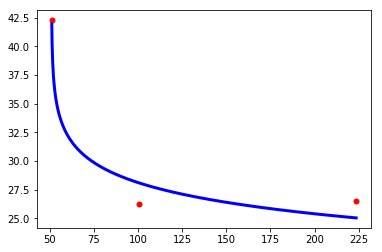

In [36]:
x = np.array(x)

m = len(x)

C = x[0] - 10**-3*(x[-1] - x[0])

ln_x = np.log(x - C)
sp = polynomial(ln_x,y,1)

xs = np.linspace(x[0] - C,x[m-1] - C,1000)
ln_xs = np.log(xs)
y_pred = sp(ln_xs)

plt.plot(x, y, 'ro', ms=5)
plt.plot(xs + C, y_pred, 'b', lw=3)

x_log = xs + C
y_log = y_pred

In [37]:
#Shape4
x = [51.10191118,100.6052411,223.5708615]
y = [57.17892445,72.74037707,72.29501013]

[-1.75753806  3.90551787  5.15121672]
[61.66240213]
73.81998033090886
57.51437118642284


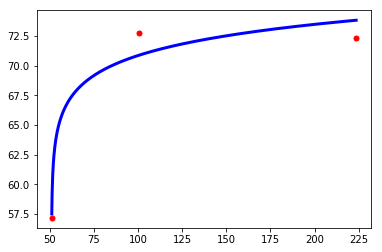

In [38]:
x = np.array(x)

m = len(x)

C = x[0] - 10**-3*(x[-1] - x[0])

ln_x = np.log(x - C)
sp = polynomial(ln_x,y,1)

print(ln_x)

print(sp([0]))

coefficients = sp.get_coeffs()

A = coefficients[1]
B = coefficients[0]

print(A)
print(B)

xs = np.linspace(x[0] - C,x[m-1] - C,1000)
ln_xs = np.log(xs)
y_pred = sp(ln_xs)

plt.plot(x, y, 'ro', ms=5)
plt.plot(xs + C, y_pred, 'b', lw=3)

x_log = xs + C
y_log = y_pred

In [5]:
def log_fit(x, y):
    
    '''
    Fits logarithm to a dataset defined by the lists x and y
    
    The fitted function is:
    
    y = A*ln(±(x-C)) + B
    
    The algorithm returns the values for the constants A, B and C, and the sign before (x-C)
    '''
    
    x = np.array(x)           # list x is turned into a Numpy-array
    y = np.array(y)           # list y is turned into a Numpy-array
    
    m = len(x)
    
    '''
    First, the function y = A*ln(x-C) + B is fitted to the data
    
    C is a constant which is slightly lower than x_min, the lowest x-value
    '''
    
    C_plus = estimate_C(x, y, 1)                  # A value for the constant C is estimated
    
    ln_x = np.log(x - C_plus)                     # ln(x - C) is calculated
    
    sp = polynomial(ln_x,y,1)                     # y = A*ln(x - C) + B is now fitted to obtain the parameters A and B
    
    B_plus = sp([0])                              # y = A*0 + B equals the parameter B
    
    A_plus = sp([1]) - B_plus                     # A = (y - B)/ln(x - C); the value 1 is arbitrarily chosen for ln(x - C) to calculate this

    res_plus = log_residual(x, y, A_plus, B_plus, C_plus, 1)      # The residual is calculated for this logarithmic fit
    
    '''
    Then, the function y = A*ln(-(x-C)) + B is fitted to the data
    
    C is now a constant which is slightly higher than x_max, the highest x-value
    '''
    
    C_min = estimate_C(x, y, -1)                  # A value for the constant C is estimated 
    
    x = np.array(list(reversed(x)))               # The lists x and y are reversed, as x will be multiplied by -1 later
    y = np.array(list(reversed(y)))               # and x must increase for the UnivariateSpline algorithm
        
    ln_x = np.log(-(x - C_min))                   # ln(-(x - C)) is calculated
    
    sp = polynomial(ln_x,y,1)                     # y = A*ln(-(x - C)) + B is now fitted to obtain the parameters A and B
    
    B_min = sp([0])                               # y = A*0 + B equals the parameter B
    
    A_min = sp([1]) - B_min                       # A = (y - B)/ln(-(x - C)); the value 1 is arbitrarily chosen for ln(-(x - C)) to calculate this
        
    res_min = log_residual(x, y, A_min, B_min, C_min, -1)         # The residual is calculated for this logarithmic fit
    
    if res_min > res_plus:                        # If the logarithm y = A*ln(x-C) + B has a better fit than A*ln(-(x-C)) + B,
                                                  # The results of the former are returned
        return A_plus, B_plus, C_plus, 1
    
    else:                                         # Otherwise, the results for the latter are returned
        
        return A_min, B_min, C_min, -1

In [6]:
def remove_repeats_at_extremes(x, y):
    
    '''
    If there are points with the x-values x_min or x_max, they are replaced by one points with the average of
    their corresponding y-values
    
    For example:
    
    x = [1,1,1,2,3,4,4]
    y = [1,2,3,4,4,5,7]
    
    New lists:
    
    x = [1,2,3,4]
    y = [2,4,4,6]
    '''
    
    m = len(x)
    
    '''
    First, all points with the value x_min are checked
    
    x_min corresponds to the first x-value x[0]
    '''
    
    y_tot = y[0]              # The y-values of all points with x-value x_min will be added to this sum
    
    i = 1                     # Counts how many points have the x-value x_min
    
    while x[1] == x[0]:       # If x[1] equals x[0], the point with index 1 (second point) must be removed
        
        y_tot += y[1]         # y[1] is added to the sum of the y-values
        
        del x[1]              # The point with index 1 is removed
        del y[1]              # In the next iteration, a new point will have index 1
        
        i += 1                # The counter i is updated
        
    y[0] = y_tot/i            # The average of the y-values of all points with x-value x_min
    
    '''
    Next, all points with the value x_max are checked
    
    x_max corresponds to the last x-value x[-1]
    '''
    
    y_tot = y[-1]             # The y-values of all points with x-value x_max will be added to this sum
    
    i = 1                     # Counts how many points have the x-value x_max
    
    while x[-2] == x[-1]:     # If x[-2] equals x[-1], the point with index -2 (second to last point) must be removed
        
        y_tot += y[-2]        # y[-2] is added to the sum of the y-values
        
        del x[-2]             # The point with index -2 is removed
        del y[-2]             # In the next iteration, a new point will have index -2
        
        i += 1                # The counter i is updated
        
    y[-1] = y_tot/i           # The average of the y-values of all points with x-value x_max
    
    return x, y

In [18]:
def estimate_C(x, y, sign_x):
    
    '''
    An equation is used to estimate C in y = A*ln(±(x-C)) + B
    
    -------------------------------------------------------------------------
    
    For y = A*ln(x-C) + B, the equation is:
    
    C = ( x3 - x1 * exp(k) ) / ( 1 - exp(k) )   with   k = (y3 - y1) / (y2 - y3) * ln(α)
    
    In this equation, x1 and x3 represents the first and last x-value in the considered interval respectively.
    
    x2 is a point between these two, which can also be written as x2 = x1 + α*(x3 - x1) = α*x3 + (1-α)*x1
    
    yi represents the y-value corresponding to xi.
    
    This equation estimates the C-value necessary to to fit an exponential between three points and was derived
    under the assumption that x3 - C >> x1 - C, which means that x1 is relatively close to C
    
    -------------------------------------------------------------------------
    
    For y = A*ln(-(x-C)) + B, the equation is:
    
    C = ( x1 - x3 * exp(k) ) / ( 1 - exp(k) )   with   k = (y1 - y3) / (y2 - y1) * ln(1 - α)
    
    This equation was derived under the assumption that C - x1 >> C - x3, which means that x3 is relatively close to C
    
    --------------------------------------------------------------------------
    
    To constant C is estimated for all data points (x2,y2) with an x-value between x1 and x3
    
    The average of the different C-values is then taken as the final estimate.
    '''
    
    x, y = remove_repeats_at_extremes(x, y)  # Repeats are removed at the extremes of the considered intervals, see the function for more information
    
    m = len(x)           # Number of data points
    
    C_est = []           # The estimates for C are stored in this list
    
    for i in range(1, m-1):
        
        alpha = (x[i] - x[0])/(x[-1] - x[0])                    # Calculate α: x2 = x1 + α*(x3 - x1) ⇒ α = (x2 - x1)/(x3 - x1)
        
        if sign_x == 1:                                        
        
            k = np.log(alpha)*(y[-1] - y[0])/(y[i] - y[-1])     # The factor k is calculated as an intermediate calculation
        
            C = (x[-1] - x[0]*np.exp(k))/(1 - np.exp(k))        # C is estimated
            
        else:
            
            k = np.log(1 - alpha)*(y[0] - y[-1])/(y[i] - y[0])  # The factor k is calculated as an intermediate calculation
        
            C = (x[0] - x[-1]*np.exp(k))/(1 - np.exp(k))        # C is estimated
        
        if C > x[0] - (x[-1] - x[0]) and C < x[-1] + (x[-1] - x[0]):
            
            C_est.append(C)                    # The estimation is added to C_est
        
    print("C_est =", C_est)
        
    C_est_avg = sum(C_est)/len(C_est)      # The average of the estimates is taken
    
    '''
    For y = A*ln(x-C) + B, C cannot be equal to or larger than the smallest x-value x1,
    as the logarithm cannot be calculated if x - C ≤ 0
    
    For this reason, C is estimated as x1 - 10^(-10)*(x3 - x1) if C ≥ x1
    
    ---------------------------------------------------------
    
    For y = A*ln(-(x-C)) + B, C cannot be equal to or smaller than the largest x-value x3,
    as the logarithm cannot be calculated if x - C ≥ 0
    
    For this reason, C is estimated as x3 + 10^(-10)*(x3 - x1) if C ≤ x3
    '''
    
    if sign_x == 1 and C_est_avg > x[0] - 10**-10*(x[-1] - x[0]):      
        
        return x[0] - 10**-10*(x[-1] - x[0])
    
    elif sign_x == -1 and C_est_avg < x[-1] + 10**-10*(x[-1] - x[0]):
    
        return x[-1] + 10**-10*(x[-1] - x[0])
    
    else:
    
        return C_est_avg

In [8]:
def log_residual(x, y, A, B, C, sign_x):
    
    '''
    Calculates the residual of a logarithmic fit
    '''
    
    m = len(x)
    
    res_tot = 0
    
    for i in range(0, m):
        
        y_pred = A*np.log(sign_x*(x[i] - C)) + B
        
        res = (y[i] - y_pred)**2
        
        res_tot += res
        
    return res_tot

In [9]:
def log_primitives(A, B, C, sign_x, x):
    
    '''
    Returns two lists storing the evolution of the signs of the first and second derivative of a logarithmic function, and a list with the extremes of the intervals
    
    For example:
    
    shape1 = [1, -1, 0, 1]
    shape2 = [1, 1, 0, 0]
    extremes = [0, 0.5, 1, 2.5, 4]
    
    Between x-values 0 and 0.5: first derivative is positive (1), second dertivative is positive (1)
    Between x-values 0.5 and 1: first derivative is negative (-1), second derivative is positive (1)
    Between x-values 1 and 2.5: first derivative is close to zero (0), second dertivative is close to zero (0)
    Between x-values 2.5 and 4: first derivative is positive (1), second derivative is close to zero (0)
    '''
    
    xs = np.linspace(x[0],x[-1],100)          # Points where derivatives are calculated
    ys = A*np.log(sign_x*(xs - C)) + B
    
    ys_der_1 = A/(xs - C)
    ys_der_2 = -A/np.square(xs - C)
    
    x_m = x[-1] - x[0]                        # x_max - x_min
    y_m = max(ys) - min(ys)                   # y_max - y_min
    
    shape1, shape2 = [], []                         # Lists containing the signs
    extremes = []                                   # List containing the extremes of the intervals
    
    if np.abs(ys_der_1[0])*x_m/y_m < 0.5:                # If the normalised first derivative is lower than 0.5, it's considered 0
        sign_der1 = 0
            
    else:
        sign_der1 = int(np.sign(ys_der_1[0]))
            
    if np.abs(ys_der_2[0])*np.square(x_m)/y_m < 1 or sign_der1 == 0:       # If the normalised derivative is lower than 1, it's considered 0
        sign_der2 = 0                                                   # If the first derivative equals 0, both derivatives are set to 0
        
    else:
        sign_der2 = int(np.sign(ys_der_2[0]))
        
    sign_change = True                                              # If the sign changes, this becomes True. It is used to make sure that two consecutive point have the same primitive
        
    for i in range(1,100):                                          # If one of the signs changes, the lists are updated with the new signs
            
        if np.abs(ys_der_1[i])*x_m/y_m < 0.5:                          # The previous equations for the derivatives are repeated for point i
            sign_der1_new = 0
            
        else:
            sign_der1_new = int(np.sign(ys_der_1[i]))
            
        if np.abs(ys_der_2[i])*np.square(x_m)/y_m < 1 or sign_der1_new == 0:
            sign_der2_new = 0
            
        else:
            sign_der2_new = int(np.sign(ys_der_2[i]))
            
        if sign_der1_new != sign_der1 or sign_der2_new != sign_der2:    # If sign changes, sign_change becomes True, or when i == 1 as this is the first point in the loop
            sign_change = True
            
        elif sign_change == True:                                   # Two consecutive points have the same derivative
                                                                        # (this elif-statement can only be reached if the previous once was False,
            if shape1 == []:                                        # this means that there was no sign change this time)
                extremes.append(x[0])
                shape1.append(sign_der1_new)                        # If the shape-list is still empty, x[0] (the first point) is added to the list 'extremes'
                shape2.append(sign_der2_new)
                
            elif shape1[-1] != sign_der1_new or shape2[-1] != sign_der2_new:
                extremes.append(xs[i-1])                 
                shape1.append(sign_der1_new)                        # If the shape-list is not empty, point i-1 is added to the list 'extremes'
                shape2.append(sign_der2_new)                        # Neither of the if-statement are reached if signs are the same as for the signs in the shape-list
                                                                        # as there is no need to have the same primitive twice consecutively
                
            sign_change = False         # 'sign_change' is set to False until a new sign change occurs
            
        sign_der1, sign_der2 = sign_der1_new, sign_der2_new         # Stored as der1 and der2 for the following iteration
        
    extremes.append(x[-1])               # Final x-value is also added to the list of extremes
    
    return shape1, shape2, extremes

In [10]:
def primitivesstring(shape1, shape2):

    '''
    Creates list of strings with letters representing the primitives of the curve
    
    '''
    
    primitives = []         # List storing the strings
    n = len(shape1)         # Number of primitives
    
    for i in range(0,n):
        
        if shape1[i] == 1 and shape2[i] == -1:        # Primitive A is represented by the signs 1 and -1
            primitives.append('A')
        
        elif shape1[i] == -1 and shape2[i] == 1:      # Primitive A is represented by the signs -1 and 1
            primitives.append('B')
        
        elif shape1[i] == 1 and shape2[i] == 1:       # Primitive A is represented by the signs 1 and 1
            primitives.append('C')
        
        elif shape1[i] == -1 and shape2[i] == -1:     # Primitive A is represented by the signs -1 and -1
            primitives.append('D')
        
        elif shape1[i] == 1 and shape2[i] == 0:       # Primitive A is represented by the signs 1 and 0
            primitives.append('E')
        
        elif shape1[i] == -1 and shape2[i] == 0:      # Primitive A is represented by the signs -1 and 0
            primitives.append('F')
        
        else:                                         # Primitive G is represented by the signs 0 and 0
            primitives.append('G')
    
    return primitives

In [11]:
def log_primitivesvisual(x, y, A, B, C, sign_x, extremes, p_string):
    
    '''
    Visualises the features for a logarithmic curve
    '''
    
    m = len(x)             # Number of data points
    n = len(extremes)      # Number of extremes
    
    xs = np.linspace(x[0],x[-1],1000)       # Points to plot
    ys = A*np.log(sign_x*(xs - C)) + B
    
    y_min, y_max = min([min(y),min(ys)]), max([max(y),max(ys)])          # Smallest and highest y-values reached by the spline and the data points 
    delta_y = y_max - y_min                                              # The range of y-values
    
    plt.plot(x, y, 'ro', ms=5)               # Data points are plotted in red
    
    '''
    The data points have been plotted; now, the spline and its features need to plotted
    '''
    
    for i in range(0,n-1):
        
        xs = np.linspace(extremes[i],extremes[i+1],1000)       # Points to plot for one primitive
        ys = A*np.log(sign_x*(xs - C)) + B
        
        if p_string[i] == 'A':                             # If the primitive is A, the curve is plotted in green
            plt.plot(xs, ys, 'g', lw=3)
        
        elif p_string[i] == 'B':                           # If the primitive is B, the curve is plotted in yellow
            plt.plot(xs, ys, 'y', lw=3)
        
        elif p_string[i] == 'C':                           # If the primitive is C, the curve is plotted in blue
            plt.plot(xs, ys, 'b', lw=3)
        
        elif p_string[i] == 'D':                           # If the primitive is D, the curve is plotted in red
            plt.plot(xs, ys, 'r', lw=3)
        
        elif p_string[i] == 'E':                           # If the primitive is E, the curve is plotted in purple
            plt.plot(xs, ys, color='#9400d3', lw=3)
        
        elif p_string[i] == 'F':                           # If the primitive is F, the curve is plotted in orange
            plt.plot(xs, ys, color='#ff8c00', lw=3)
        
        else:                                              # If the primitive is G, the curve is plotted in grey
            plt.plot(xs, ys, color='#808080', lw=3)
        
        xt = (extremes[i]+extremes[i+1])/2 - (extremes[n-1]-extremes[0])/40    # x-position where letter will be placed on graph
        
        if delta_y != 0:
            
            yt = y_min - 0.2*delta_y                       # y-position where letter will be placed on graph
 
        elif y_min != 0:

            yt = 0.95*y_min
            
        else:
            
            yt = -5
        
        plt.text(xt,yt,p_string[i],fontsize=15)            # Letter representing primitive is printed on graph
    
    '''
    The black vertical lines are now plotted between the primitives
    '''
    
    if delta_y != 0:
        
        yp = np.linspace(y_min - 0.2*delta_y, y_max + 0.2*delta_y, 1000)         # y points to plot in the vertical line
    
    elif y_min != 0:
        
        yp = np.linspace(0.95*y_min, 1.05*y_max, 1000)
        
    else:
        
        yp = np.linspace(-5, 5, 1000)
    
    for i in range(0,n):
        
        xp = [extremes[i]]*1000                # List with 1000 times the x-position of the line
        
        plt.plot(xp, yp, 'k', lw=2)          # Vertical line is plotted

In [12]:
def log_rvalue(A, B, C, sign_x, x, y):
   
    '''
    Calculates multiple correlation coefficient R of a spline fit
    '''
    
    ssy = np.sum(np.square(A*np.log(sign_x*(x - C)) + B))      # Sum of squares of prediction
    sse = log_residual(x, y, A, B, C, sign_x)                  # Sum of squares of error
    R = np.sqrt(ssy/(sse+ssy))                                 # Multiple correlation coefficient
    
    return R

C = 359.30531407179194
shape1 = [0, 1]
shape2 = [0, 1]
extremes = [95.81608347, 319.38194765303035, 359.3044234]
R = [1.]


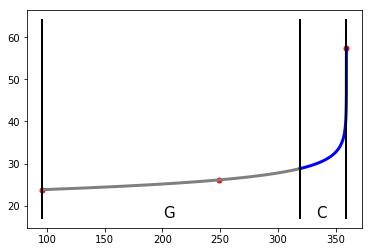

In [13]:
#Shape1
x = [95.81608347,249.1218171,359.3044234]
y = [23.76814889,26.09464349,57.38339297]

A, B, C, sign_x = log_fit(x,y)

print("C =", C)

m = len(x)

xs = np.linspace(x[0], x[-1],1000)
ys = A*np.log(sign_x*(xs - C)) + B

shape1, shape2, extremes = log_primitives(A, B, C, sign_x, x)
p_string = primitivesstring(shape1, shape2)

log_primitivesvisual(x, y, A, B, C, sign_x, extremes, p_string)

R = log_rvalue(A, B, C, sign_x, x, y)

print("shape1 =", shape1)
print("shape2 =", shape2)
print("extremes =", extremes)
print("R =", R)

C = 1.056
shape1 = [0, -1, -1]
shape2 = [0, 0, -1]
extremes = [0, 0.35000000000000003, 0.47000000000000003, 0.99]
R = [0.99991126]
C_new = [1.05459752]


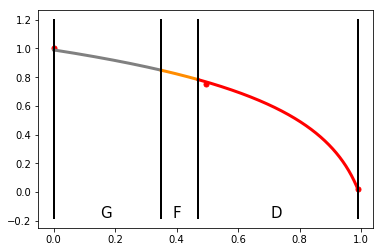

In [14]:
#Shape2
x = [0, 0.495, 0.99]
y = [1, 0.754975, 0.0199]

A, B, C, sign_x = log_fit(x,y)

print("C =", C)

m = len(x)

xs = np.linspace(x[0], x[-1],1000)
ys = A*np.log(sign_x*(xs - C)) + B

shape1, shape2, extremes = log_primitives(A, B, C, sign_x, x)
p_string = primitivesstring(shape1, shape2)

log_primitivesvisual(x, y, A, B, C, sign_x, extremes, p_string)

R = log_rvalue(A, B, C, sign_x, x, y)

print("shape1 =", shape1)
print("shape2 =", shape2)
print("extremes =", extremes)
print("R =", R)

C_new = (x[0] - x[-1]*np.exp((y[0] - y[-1])/A))/(1 - np.exp((y[0] - y[-1])/A))
print("C_new =", C_new)

shape1 = [-1, 0]
shape2 = [1, 0]
extremes = [51.10191118, 66.78090666363636, 223.5708615]
R = [0.99990214]


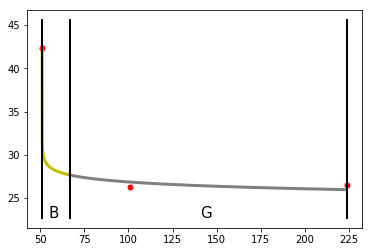

In [44]:
#Shape3
x = [51.10191118,100.6052411,223.5708615]
y = [42.28049668,26.27784215,26.509831]

A, B, C, sign_x = log_fit(x,y)

m = len(x)

xs = np.linspace(x[0], x[-1],1000)
ys = A*np.log(sign_x*(xs - C)) + B

shape1, shape2, extremes = log_primitives(A, B, C, sign_x, x)
p_string = primitivesstring(shape1, shape2)

log_primitivesvisual(x, y, A, B, C, sign_x, extremes, p_string)

R = log_rvalue(A, B, C, sign_x, x, y)

print("shape1 =", shape1)
print("shape2 =", shape2)
print("extremes =", extremes)
print("R =", R)

shape1 = [1, 0]
shape2 = [-1, 0]
extremes = [51.10191118, 66.78090666363636, 223.5708615]
R = [0.99996943]


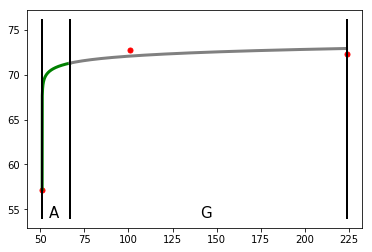

In [45]:
#Shape4
x = [51.10191118,100.6052411,223.5708615]
y = [57.17892445,72.74037707,72.29501013]

A, B, C, sign_x = log_fit(x,y)

m = len(x)

xs = np.linspace(x[0], x[-1],1000)
ys = A*np.log(sign_x*(xs - C)) + B

shape1, shape2, extremes = log_primitives(A, B, C, sign_x, x)
p_string = primitivesstring(shape1, shape2)

log_primitivesvisual(x, y, A, B, C, sign_x, extremes, p_string)

R = log_rvalue(A, B, C, sign_x, x, y)

print("shape1 =", shape1)
print("shape2 =", shape2)
print("extremes =", extremes)
print("R =", R)

C_est = [8.769590841603154]
C_est = [23.785312306876207]
shape1 = [1, 1, 0]
shape2 = [-1, 0, 0]
extremes = [9.279016, 16.747965999999998, 17.480216, 23.777566]
R = [0.99986068]


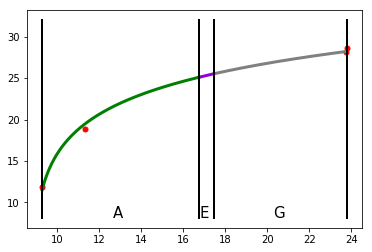

In [19]:
x = [9.279016, 11.321325, 23.768149, 23.777566]
y = [11.849708, 18.886472, 28.143203, 28.577963]

A, B, C, sign_x = log_fit(x,y)

m = len(x)

xs = np.linspace(x[0], x[-1],1000)
ys = A*np.log(sign_x*(xs - C)) + B

shape1, shape2, extremes = log_primitives(A, B, C, sign_x, x)
p_string = primitivesstring(shape1, shape2)

log_primitivesvisual(x, y, A, B, C, sign_x, extremes, p_string)

R = log_rvalue(A, B, C, sign_x, x, y)

print("shape1 =", shape1)
print("shape2 =", shape2)
print("extremes =", extremes)
print("R =", R)